In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Loading the dataset and viewing the data

In [152]:
ds= pd.read_csv('../data/loan_data.csv')

In [154]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [156]:
ds.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [158]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [160]:
ds.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

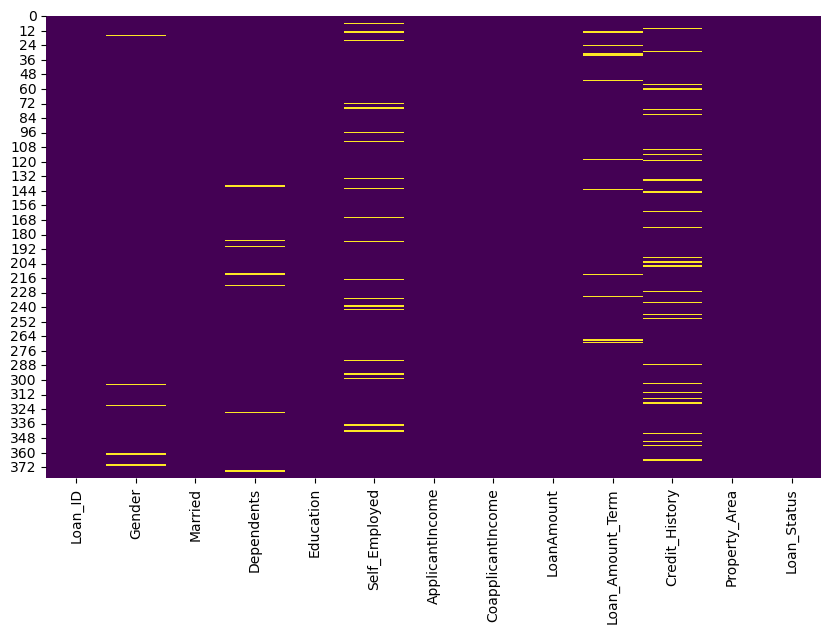

In [162]:
plt.figure(figsize=(10, 6))
sns.heatmap(ds.isnull(), cbar=False, cmap='viridis')

In [164]:
ds['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    312
180.0     29
480.0     11
300.0      7
120.0      3
84.0       3
240.0      2
60.0       1
12.0       1
36.0       1
Name: count, dtype: int64

In [166]:
ds['Credit_History'].value_counts()

Credit_History
1.0    294
0.0     57
Name: count, dtype: int64

In [172]:
#flagging the missing values by listing it as Credit_History_Missing
ds['Credit_History_Missing'] = ds['Credit_History'].isnull().astype(int)
ds['Credit_History'] = ds['Credit_History'].fillna(ds['Credit_History'].mode()[0])

In [174]:
ds['Credit_History'].value_counts()

Credit_History
1.0    324
0.0     57
Name: count, dtype: int64

## handling missing values and cleaning the dataset

In [96]:
#ds['Gender'].fillna(ds['Gender'].mode()[0], inplace=True)
ds['Gender'] = ds['Gender'].fillna(ds['Gender'].mode()[0])
ds['Dependents'] = ds['Dependents'].fillna(ds['Dependents'].mode()[0])
ds['Self_Employed'] = ds['Self_Employed'].fillna(ds['Self_Employed'].mode()[0])
ds['Loan_Amount_Term'] = ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].mode()[0])
ds['Credit_History'] = ds['Credit_History'].fillna(ds['Credit_History'].mode()[0])

In [98]:
ds.drop(columns=['Loan_ID'], inplace=True)
ds.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Label Encode simple binary columns

In [176]:
label_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status', 'Dependents']

le = LabelEncoder()

for col in label_cols:
    ds[col] = le.fit_transform(ds[col])

In [178]:
ds['Dependents'] = ds['Dependents'].replace('3+', 3).astype(int)

## One-Hot Encode multi-class categorical column

In [181]:
ds = pd.get_dummies(ds, columns=['Property_Area'], drop_first=True)

In [183]:
ds.head()
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  381 non-null    object 
 1   Gender                   381 non-null    int64  
 2   Married                  381 non-null    int64  
 3   Dependents               381 non-null    int64  
 4   Education                381 non-null    int64  
 5   Self_Employed            381 non-null    int64  
 6   ApplicantIncome          381 non-null    int64  
 7   CoapplicantIncome        381 non-null    float64
 8   LoanAmount               381 non-null    float64
 9   Loan_Amount_Term         370 non-null    float64
 10  Credit_History           381 non-null    float64
 11  Loan_Status              381 non-null    int64  
 12  Credit_History_Missing   381 non-null    int64  
 13  Property_Area_Semiurban  381 non-null    bool   
 14  Property_Area_Urban      3

In [187]:
ds['Loan_Amount_Term'] = ds['Loan_Amount_Term'].fillna(ds['Loan_Amount_Term'].median())

In [191]:
ds.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Credit_History_Missing     0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

## Correlations

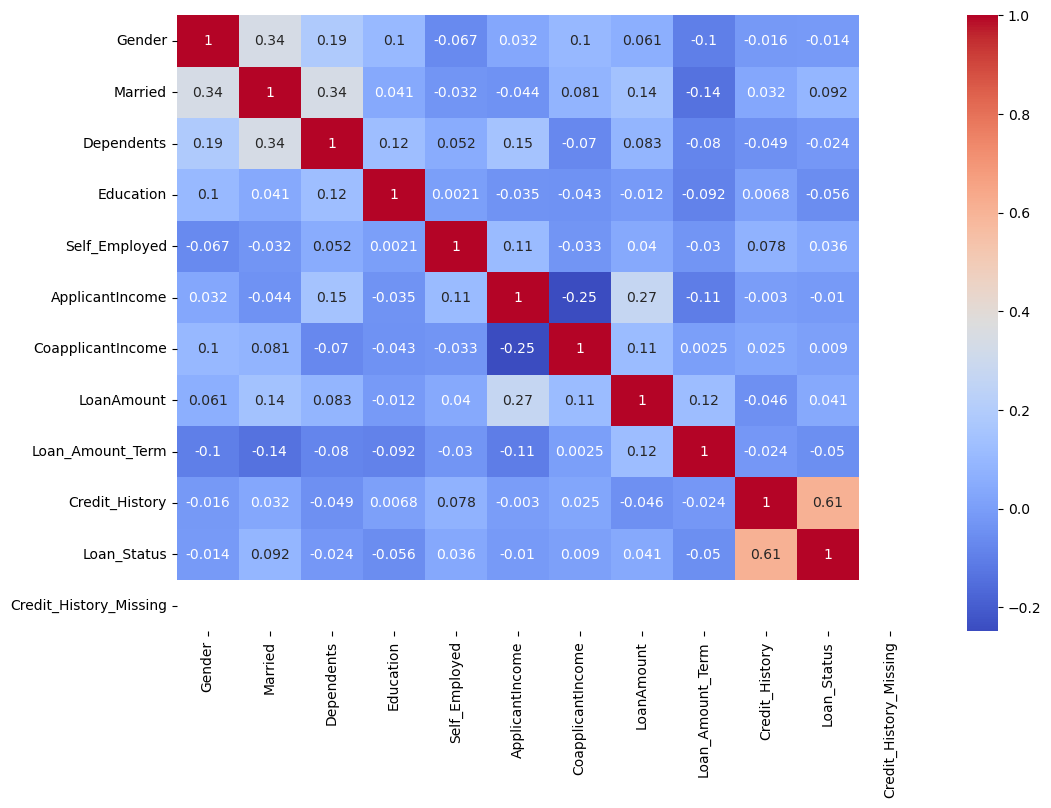

In [198]:
# Exclude non-numeric columns like 'Loan_ID' and any boolean columns
numeric_columns = ds.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = ds[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()